In [1]:
#Import the frequently used libraries
#Import necessary modules to read, clean, analyse and visualise data

import csv
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re
import string
from textblob import TextBlob


In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (366 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ekphrasis

Processing ./.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f/ekphrasis-0.5.1-py3-none-any.whl
Processing ./.cache/pip/wheels/49/1c/fc/8b19700f939810cd8fd9495ae34934b246279791288eda1c31/ftfy-5.8-py3-none-any.whl
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Processing ./.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2/termcolor-1.1.0-py3-none-any.whl
  Using cached ujson-4.0.1-cp37-cp37m-manylinux1_x86_64.whl (179 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordsegment

  Using cached wordsegment-1.3.1-py2.py3-none-any.whl (4.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import necessary packages for textual and sentiment analysis 

import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


#These functions are used for preprocessing mainly
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
data_con = pd.read_csv("Twitter_final_9.csv", sep=',' , encoding='latin-1')

In [7]:
data_con.shape

(539, 17)

In [8]:
data_con.head()

,Unnamed: 0,timestamp,hashtags,tweets,replies,retweets,likes,username,location,friends,followers,verified,all_hashtags,all_hashtags_seg,tweets_prep,tweets_clean,label
0,7,2020-09-27 23:28:39,peace,"On July 15 Ilham #Aliyev stated ""What kind of...",NaN,NaN,2.0,TheArmenianBoy,IN GOD'S HANDS,"2,805","1,040",0,Aliyev peace StopAzerbaijaniAggression StopAliyev,aliyev peace stop azerbaijani aggression stop ...,"On July Ilham stated ""What kind of negotiat...",On July Ilham stated What kind of negotiati...,Azerbaijan_Armenia
1,12,2020-09-27 23:18:02,peace,"Distance Reiki is effective, safe and healing....",NaN,NaN,1.0,ColleenBenelli,"Portland, Oregon",265,868,0,Reiki quarantine distanceReiki globalconnectio...,reiki quarantine distance reiki global connect...,"Distance Reiki is effective, safe and healing....",Distance Reiki is effective safe and healing ...,covid
2,29,2020-09-27 23:08:32,peace,tw // war I hope u never wake up like i did t...,NaN,1.0,1.0,_ATEEZSTAR_,Planet Earth â¡ she/her â 23,322,189,0,ArtsakhStrong Peace,artsakh strong peace,tw // war I hope u never wake up like i did t...,tw war I hope u never wake up like i did tod...,Azerbaijan_Armenia
3,34,2020-09-27 23:00:51,peace,Peace people peace #armenia #Azarbaijan #peac...,NaN,NaN,NaN,_kardashians_gr,United States,151,87,0,armenia Azarbaijan peace,armenia azarbaijan peace,Peace people peace Diana Gurtskaya - Pea...,Peace people peace Diana Gurtskaya Peac...,Azerbaijan_Armenia
4,41,2020-09-28 23:42:20,peace,#NobelPeacePrize #Trump2020 #FreeHumanity #Peace,NaN,NaN,NaN,Gab_ai_sfujioka,"Orlando, FL","2,082","1,394",0,NobelPeacePrize Trump2020 FreeHumanity Peace,nobel peace prize trump2020 free humanity peace,,,USA


In [9]:
last_tweet=data_con.iloc[0].timestamp
first_tweet=data_con.iloc[-1].timestamp
format_date="%Y-%m-%d %H:%M:%S"
time_span=datetime.strptime(last_tweet, format_date)-datetime.strptime(first_tweet, format_date)
print("Tweets were collected over the time of:", time_span)
print('The first tweet was postet on:', first_tweet, 'and the last tweet was posted on:', last_tweet)

Tweets were collected over the time of: -3 days, 12:56:39
The first tweet was postet on: 2020-09-30 10:32:00 and the last tweet was posted on: 2020-09-27 23:28:39


In [10]:
from ekphrasis.classes.segmenter import Segmenter
from wordsegment import load, segment
load()
segment('thisisatest hello how are you')

['this', 'is', 'a', 'test', 'hello', 'how', 'are', 'you']

In [11]:
#Pre-processing of hashtags

def preprocess_hashtags(hashtags):
    """This function will clean the hashtags through removal of the brackets 
    and converting all letters to the lower case for better understanding. 
    Punctuations will be removed as well followed by tokenisation of each hashtag"""
    hashtags=hashtags.replace('[','') #Replaces the brackets
    hashtags=hashtags.replace(']','')
    hashtags=hashtags.translate(str.maketrans('', '', string.punctuation)) #makestrans() translates each punctutation to none = ''
    #The following tokenisation is not necessarily needed for the hashtags since no lemmatising/semantic analysis will be done. 
    hashtag_tokens=word_tokenize(hashtags.lower()) #word_tokenize returns a tokenised version with divided substrings and lower cases
    
    return " ".join(hashtag_tokens) #Joins all tokenised substrings

#def segment_hashtags(string):
    #hashtag_tokens=segment(preprocess_hashtags(hashtags))
    #return hashtag_tokens

def segment_hashtags(string):
    string='  '.join(segment(preprocess_hashtags(hashtags)))
    hashtag_tokens=word_tokenize(string)
    return " ".join(hashtag_tokens)

#segment_hashtags(preprocess_hashtags(hashtags))
#Get the number of hashtags for each tweet

def hashtag_len(hashtags):
    """This function returns the number of hashtags used within a tweet"""
    hashtag_tokens=word_tokenize(hashtags) #Tokenisation is necessary to create substrings which then can be countet
    return len(hashtag_tokens)


#Prints out hashtags for each tweet and the number of hashtags used

for hashtags in data_con.all_hashtags:
    output_length = hashtag_len(segment_hashtags(hashtags)) #passes the output of the first function into the argument of the second function
    print(output_length)
    print(segment_hashtags(hashtags))
    #print(' '.join(segment(preprocess_hashtags(hashtags))))
    #print(" ")

7
aliyev peace stop azerbaijani aggression stop aliyev
14
reiki quarantine distance reiki global connection peace love healing intention world events pandemic solutions
3
artsakh strong peace
3
armenia azarbaijan peace
7
nobel peace prize trump2020 free humanity peace
8
worry anxiety peace calm kindness logo synthesis covid19
9
peace armenia artsakh strong armenia strong stop azeri agression
2
peace trump2020
6
armenia a zerbe jd an peace
26
peace passion vision art africa guinea african art guinean girl african beauty cinematography cinematic talent mode model actor fix eur de production in de documentary love
26
peace passion vision art africa guinea african art guinean girl african beauty cinematography cinematic talent mode model actor fix eur de production in de documentary love
10
fibromyalgia peace quarantine lockdown covid19 home sacrificial jesus is lord
26
peace passion vision art africa guinea african art guinean girl african beauty cinematography cinematic talent mode model

In [12]:
#Pre-processing of tweets

"""Stop words such as 'the', 'and', 'a' etc. should be excluded from our tweets.
This is due to several reasons: Stop words are very frequent and would interfere with our semantic and textual analysis 
as well as word classification. """

stop_words = set(stopwords.words('english')) #This function defines a set of stop words within the English language

"""The next cleaning step of tweet data includes regular expression operations, word_tokenize, 
WordNetLemmatizer and nltk.pos_tag from the nltk library"""

def preprocess_tweets(tweet):
    """This function will clean the tweets through several steps for better understanding and further analysis. 
    Steps include lowering cases, replacing punctuations, removal of b's, removal of special strings,
    removal of URLS, removal of hashtags and tags, removal of stopwords and tokenisation and lemmatisation of tweet words"""
    #Converts all uppercase characters into lowercase characters
    tweet=tweet.lower() 
    #Replaces &amp; with &
    tweet=tweet.replace('&amp;','&')
    #Removes the 'b'' or 'b"'  string at the beginning of each tweet
    tweet = re.sub(r"(b')|(b\")","",tweet, flags=re.MULTILINE)
    #Removes characters with random string and integer combinations, such as "\xe2x80x9c"
    tweet = re.sub(r'[0-9]*\\x+([a-z]|[0-9]|[\\])*[^A-Z]', "", tweet)
    #Removes URLs via regular expression operations. Any pattern that starts with http (or https... ) followed by one or more non-white-space characters will be removed
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    #Removes tags with '@' and hashtag character '#'
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Removes any punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Removes stopwords and tokenises tweet string to substrings
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #Defines lemmatizer using WordNetLemmatizer from nltk.stem
    lm = WordNetLemmatizer()
    #Lemmatises each pre-filtered tweet token with the correct POS (part of speech) tag 
    lemmatized_words = [lm.lemmatize(w, get_pos(w)) for w in filtered_words]

    return " ".join(lemmatized_words) #joins all tokenised and cleaned strings



"""nltk.pos_tag returns the POS tag for a given word (verb, noun etc.).
Get the correct nltk.pos_tag for each word with get_pos:"""

def get_pos(word):
        """Maps the POS tag to a character to pass it on via a dictionnary"""
        tag = nltk.pos_tag(word)[0][1][0].lower() #Returns the first string of the POS tag for the word (e.g. n,j,v)
        """WordNet is our lexical database which includes nouns, verbs, adjectives and adverbs. 
        Other words such as prepositions are ignored"""
        tagging_dict = {"j": wordnet.ADJ, #Creates dictionnary with POS tags which is needed for lemmatize()
                "n": wordnet.NOUN,
                "r": wordnet.ADV,
                "v": wordnet.VERB}
        return tagging_dict.get(tag, wordnet.NOUN) #value=wordnet.Noun if no other value is found for the tag

    
    
    
"""Next, we want to get the number of strings within each cleaned tweet"""  

def clean_tweet_len(tweet):
    """Returns the number of strings in a tweet"""
    tweet_tokens=word_tokenize(tweet)
    return len(tweet_tokens)



# Finally, we want to print our results to take a look:

for tweets in data_con.tweets:
    print(preprocess_tweets(tweets))
    print("")

july 15 ilham aliyev stated kind negotiations held covid enemy country nonsenseâhow intl community expect man 2 negotiate peace stop call âboth sidesâcall aggressor stopazerbaijaniaggression stopaliyev

distance reiki effective safe healing reiki quarantine distancereiki globalconnection peace love healing intention worldevents pandemic solution

tw war hope u never wake like today artsakhstrong peace

peace people peace armenia azarbaijan peace diana gurtskaya peace come eurovision 2008 georgia î¼î­ïï

nobelpeaceprize trump2020 freehumanity peace

easy react happen world feelings worry anxiety want feel little peace calm kindness logosynthesis help check video covid19

peace armenia artsakh strong armeniastrong stopazeriagression

trump rally turn people trump supporter thought via peace trump2020

waå¼niaki z biznesu zbrojeniowego testujä nowä broå kto wiedziaå å¼e w armenii dziaåajä 3 przejåcia graniczne 2 gruzji 1 iranu ile dalej dziaåajä armenia azerbejdå¼an peace

qu

After all the cleaning steps, we want to create a DataFrame with all columns that we find useful for our further analysis.

In [13]:
clean_tweets = data_con.loc[:,("username","followers","location")] #Creates DataFrame with original columns username and followers_count


clean_tweets['Clean_tweet'] = data_con['tweets'].apply(preprocess_tweets)#Adds a new column with cleaned tweets
clean_tweets['Clean_hashtags'] = data_con['all_hashtags'].apply(preprocess_hashtags) #Adds a new column with cleaned hashtags
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len) #Adds a new column with number of hashtags for each tweet
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len)
#Adds a new column with number of strings within each tweet

In [14]:
def segment_hashtags(hashtag):
    string='  '.join(segment(hashtag))
    hashtag_tokens=word_tokenize(string)
    return " ".join(hashtag_tokens)

In [15]:
def segment_tweets(tweet):
    string='  '.join(segment(tweet))
    tweet_tokens=word_tokenize(string)
    return " ".join(tweet_tokens)

In [16]:
#for hashtag in clean_tweets.Clean_hashtags:
    #output_length = hashtag_len(segment_hashtags(hashtags)) #passes the output of the first function into the argument of the second function
    #print(output_length)
    #print(segment_hashtags(hashtag))
    

#clean_tweets['Clean_hashtags'] = data_con['all_hashtags'].apply(segment_hashtags)

In [17]:
clean_tweets['Clean_hashtags'] = clean_tweets['Clean_hashtags'].apply(segment_hashtags)
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len)

clean_tweets['Clean_tweet'] = clean_tweets['Clean_tweet'].apply(segment_tweets)
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len)

In [18]:
clean_tweets.Clean_tweet.tail()

534    artsakh strong armenia strong stop azerbaijani...
535    azerbaijani air force target city mar take rt ...
536    uavtb2bayraktar armenian soldier bombing azerb...
537    war also present medium country really worried...
538    hey sorry interrupt trump biden post actual re...
Name: Clean_tweet, dtype: object

In [19]:
#Remove rows with same Clean_tweet content
clean_tweets.drop_duplicates(subset="Clean_tweet",keep="first",inplace=True) #drops duplicates and keeps the first version of it

In [20]:
#Remove rows without location
clean_tweets = clean_tweets[clean_tweets['location'].notna()]

In [21]:
#drop rows with irrelevant words, ~ is for negation of operation
exclude_words = ['workplace','employees','company','coaching','fitness','music','parenting']
clean_tweets = clean_tweets[~clean_tweets.Clean_tweet.str.contains('|'.join(exclude_words))]
clean_tweets = clean_tweets[~clean_tweets.Clean_hashtags.str.contains('|'.join(exclude_words))]

In [22]:
clean_tweets.head()

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count
0,TheArmenianBoy,"1,040",IN GOD'S HANDS,july 15ilhamaliyev stated kind negotiations he...,aliyev peace stop azerbaijani aggression stop ...,7,29
1,ColleenBenelli,868,"Portland, Oregon",distance reiki effective safe healing reiki qu...,reiki quarantine distance reiki global connect...,14,19
2,_ATEEZSTAR_,189,Planet Earth â¡ she/her â 23,tw war hope u never wake like today artsakh st...,artsakh strong peace,3,11
3,_kardashians_gr,87,United States,peace people peace armenia azarbaijan peace di...,armenia azarbaijan peace,3,15
4,Gab_ai_sfujioka,"1,394","Orlando, FL",nobel peace prize trump2020 free humanity peace,nobel peace prize trump2020 free humanity peace,7,7


In [23]:
#new indexing so that removed duplicate row indeces won't be missing in further analysis 
clean_tweets.reset_index(drop=True, inplace=True) #drops the index

clean_tweets.index.values.max() #returns the last row index of the data set

351

In [24]:
"""This assert makes sure that there are as many unique tweets as number of rows"""

if not len(list(clean_tweets.Clean_tweet.unique())) == clean_tweets.shape[0]:
    assert False

In [25]:
"""This assert makes sure that the indexing is correct"""

if not clean_tweets.index.values.max() == (len(list(clean_tweets.Clean_tweet.unique()))-1): #-1 since indexing starts at 0
    assert False

In [26]:
len(clean_tweets.location.unique())

178

Now, we want to create a new column that decodes the latitude and longitude values for each country or city.

In [27]:
pip install geopandas

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached pyproj-3.0.0.post1-cp37-cp37m-manylinux2010_x86_64.whl (6.4 MB)
  Using cached Fiona-1.8.18-cp37-cp37m-manylinux1_x86_64.whl (14.8 MB)
  Using cached Shapely-1.7.1-cp37-cp37m-manylinux1_x86_64.whl (1.0 MB)
  Using cached cligj-0.7.1-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install geopy

  Using cached geopy-2.0.0-py3-none-any.whl (111 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
from geopy.geocoders import Nominatim

In [30]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Champ de Mars, Paris, France')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = 48.85614465, Longitude = 2.297820393322227


In [31]:
from geopy.extra.rate_limiter import RateLimiter

In [32]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
clean_tweets['geo_location'] = clean_tweets['location'].apply(geocode)
clean_tweets['point'] = clean_tweets['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)
clean_tweets[['latitude', 'longitude','altitude']] = pd.DataFrame(clean_tweets['point'].tolist(), index=clean_tweets.index)

In [33]:
clean_tweets.columns

Index(['username', 'followers', 'location', 'Clean_tweet', 'Clean_hashtags',
       'Hashtag_count', 'Word_count', 'geo_location', 'point', 'latitude',
       'longitude', 'altitude'],
      dtype='object')

In [34]:
clean_tweets.head(20)

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,geo_location,point,latitude,longitude,altitude
0,TheArmenianBoy,"1,040",IN GOD'S HANDS,july 15ilhamaliyev stated kind negotiations he...,aliyev peace stop azerbaijani aggression stop ...,7,29,"(Gods Hands graffiti, 20, Παναγή Τσαλδάρη, Ομό...","(37.9830799, 23.7253438, 0.0)",37.983080,23.725344,0.0
1,ColleenBenelli,868,"Portland, Oregon",distance reiki effective safe healing reiki qu...,reiki quarantine distance reiki global connect...,14,19,"(Portland, Metro, Multnomah County, Oregon, Un...","(45.5202471, -122.6741949, 0.0)",45.520247,-122.674195,0.0
2,_ATEEZSTAR_,189,Planet Earth â¡ she/her â 23,tw war hope u never wake like today artsakh st...,artsakh strong peace,3,11,None,None,NaN,NaN,NaN
3,_kardashians_gr,87,United States,peace people peace armenia azarbaijan peace di...,armenia azarbaijan peace,3,15,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
4,Gab_ai_sfujioka,"1,394","Orlando, FL",nobel peace prize trump2020 free humanity peace,nobel peace prize trump2020 free humanity peace,7,7,"(Orlando, Orange County, Florida, United State...","(28.5421109, -81.3790304, 0.0)",28.542111,-81.379030,0.0
5,CaswellCathy,280,"Waverley, Nova Scotia",easy react happen world feelings worry anxiety...,worry anxiety peace calm kindness logo synthes...,8,19,"(Waverley, Halifax Regional Municipality, Hali...","(44.7827118, -63.5989287, 0.0)",44.782712,-63.598929,0.0
6,cnnisbiased,"2,382",USA,trump rally turn people trump supporter though...,peace trump2020,2,8,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
7,Trader2020V,5,Malta,waniakizbiznesuzbrojenio we got estujnowbrokto...,armenia a zerbe jd an peace,6,9,"(Malta, (35.8885993, 14.4476911))","(35.8885993, 14.4476911, 0.0)",35.888599,14.447691,0.0
8,KaniCisse,59,GuinÃ©e,quede talent et de passion peace passion visio...,peace passion vision art africa guinea african...,26,31,None,None,NaN,NaN,NaN
9,KaniCisse,59,GuinÃ©e,toute une signification peace passion vision a...,peace passion vision art africa guinea african...,26,29,None,None,NaN,NaN,NaN


In [35]:
clean_tweets = clean_tweets[clean_tweets['geo_location'].notna()]
#clean_tweets = clean_tweets.drop(columns='point')
clean_tweets.reset_index(drop=True, inplace=True) #drops the index
clean_tweets.index.values.max() #returns the last row index of the data set

269

In [36]:
clean_string = ''.join(clean_tweets["Clean_tweet"])
clean_hasht = ''.join(clean_tweets["Clean_hashtags"])

#Frequency of most common terms in "Clean_tweet" is calculated

#Create a new DataFrame with tokenised words of all tweets
df_words = pd.DataFrame(nltk.tokenize.word_tokenize(clean_string), columns=["words"])
#Count the frequency of each word using value_counts()
word_freq = df_words["words"].value_counts() #This is a pandas.series


#Convert series to a dictionnairy to a dataframe
frame_word_freq = {"word": word_freq.index, "frequency": word_freq} #Creates a dictionnairy
df_word_freq = pd.DataFrame(frame_word_freq) #Creates a DataFrame 
df_word_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with words that appear less than 7 times
df_word_freq = df_word_freq.drop(df_word_freq[df_word_freq.frequency < 50].index) 



In [37]:
#Frequency of most common terms in "Clean_hashtags" is calculated

#Create a new DataFrame with tokenised words of all hashtags
df_hashtags = pd.DataFrame(nltk.tokenize.word_tokenize(clean_hasht), columns=["hashtags"])
#Count the frequency of each word using value_counts()
hasht_freq = df_hashtags["hashtags"].value_counts()


# hasht_freq is a series. It will be converted into a dataframe to easily create a barchart
frame_hasht_freq = {"hashtag": hasht_freq.index, "frequency": hasht_freq} #Creates a dictionnairy 
df_hasht_freq = pd.DataFrame(frame_hasht_freq) #Creates a DataFrame 
df_hasht_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with hashtags that appear less than 4 times
df_hasht_freq = df_hasht_freq.drop(df_hasht_freq[df_hasht_freq.frequency < 50].index)

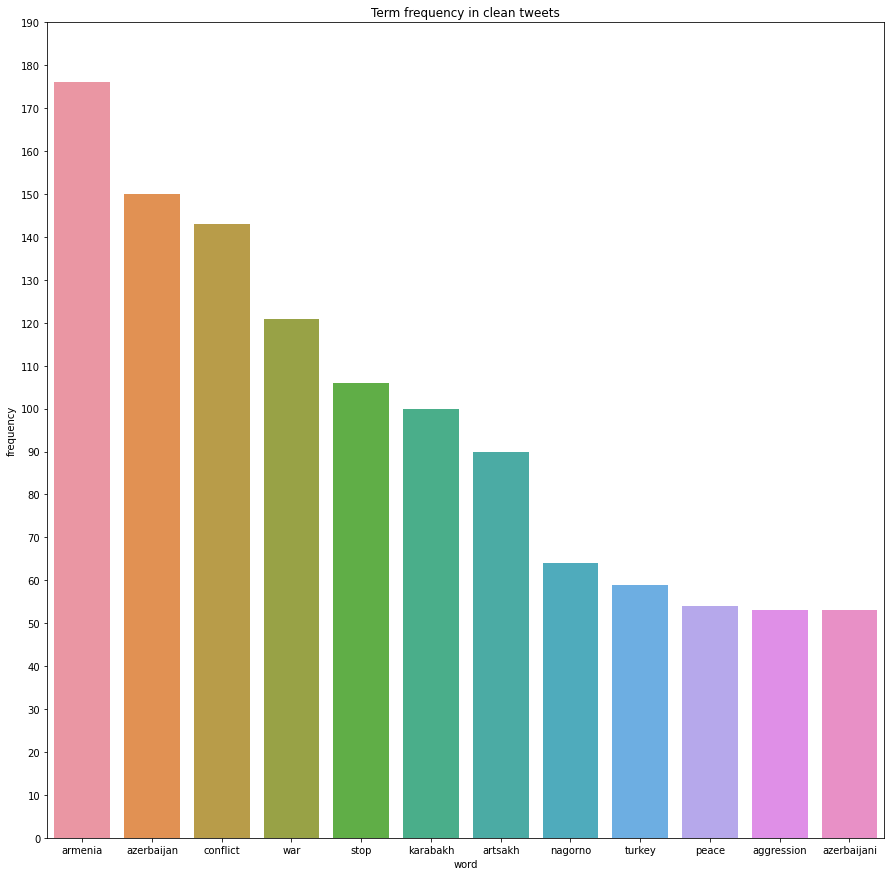

In [38]:
#Barplot fof frequency of terms in Clean_tweet

plt.figure(figsize=(15,15)) #Sets figure size

ax=sns.barplot(x="word",y="frequency", data=df_word_freq) #Creates a barchart for each word and its frequency
ax.set(title="Term frequency in clean tweets") #Sets the title
plt.yticks(np.arange(0,200,10)) #Sets the min, max values and tick size
plt.savefig('September_frequent_words1.png')
plt.show()

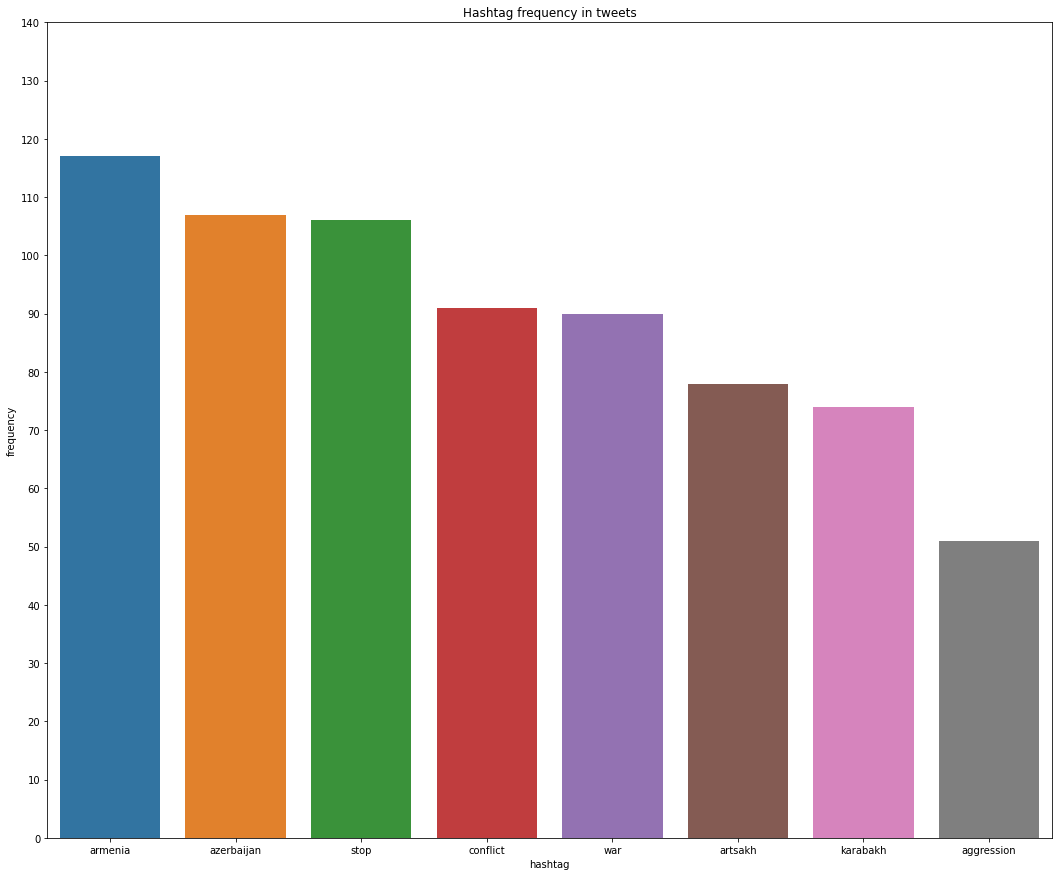

In [39]:
#Barplot of frequency of terms in Clean_hashtags
plt.figure(figsize=(18,15)) #Sets figure size

hasht_ax=sns.barplot(x="hashtag",y="frequency", data=df_hasht_freq) #Creates a barchart for each word and its frequency
hasht_ax.set(title="Hashtag frequency in tweets") #Sets the title
plt.yticks(np.arange(0,150,10)) #Sets the min, max values and tick size
plt.savefig('September_frequent_hashtags1.png')
plt.show()

### Based on our findings from above, we now want to label tweets accordingly to their topic. For that reason, we will concentrate on the Armenia-Azerbaijan conflict and the US.

In [40]:
arm_aze_label = ['azerbaijan','armenia','armenian','azerbaijani','karabakh','nagorno','artsakh','aliyev']
usa_label = ['trump','obama','usa','harris','biden']
turkey_label = ['erdogan','turkey','istanbul']
covid_label = ['covid','covid19','corona','virus','i used htpandemic','coronavirus']
yemen_label = ['yemen','yemeni']
africa_label = ['africa','ethiopia']

In [41]:
def get_labels(tweet):
    if any(words in tweet for words in arm_aze_label):
        return 'Azerbaijan_Armenia'
    elif any(words in tweet for words in usa_label):
        return 'USA'
    elif any(words in tweet for words in turkey_label):
        return 'Turkey'
    elif any(words in tweet for words in covid_label):
        return 'covid'
    elif any(words in tweet for words in yemen_label):
        return 'Yemen'
    elif any(words in tweet for words in africa_label):
        return 'Africa'
    else:
        return 'Other'


        

In [42]:
clean_tweets['Label'] = clean_tweets['Clean_tweet'].apply(get_labels)

print(clean_tweets.Label)

0      Azerbaijan_Armenia
1                   Other
2      Azerbaijan_Armenia
3                     USA
4                   covid
              ...        
265    Azerbaijan_Armenia
266    Azerbaijan_Armenia
267    Azerbaijan_Armenia
268    Azerbaijan_Armenia
269    Azerbaijan_Armenia
Name: Label, Length: 270, dtype: object


In [43]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install folium

  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
from geopy.geocoders import Nominatim

In [47]:
from geopy.extra.rate_limiter import RateLimiter

In [48]:
import folium 

In [49]:
from folium.plugins import FastMarkerCluster

In [50]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
clean_tweets['geo_location'] = clean_tweets['location'].apply(geocode)
clean_tweets['point'] = clean_tweets['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)
clean_tweets[['latitude', 'longitude','altitude']] = pd.DataFrame(clean_tweets['point'].tolist(), index=clean_tweets.index)

In [51]:
clean_tweets.head(5)

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,geo_location,point,latitude,longitude,altitude,Label
0,TheArmenianBoy,"1,040",IN GOD'S HANDS,july 15ilhamaliyev stated kind negotiations he...,aliyev peace stop azerbaijani aggression stop ...,7,29,"(Gods Hands graffiti, 20, Παναγή Τσαλδάρη, Ομό...","(37.9830799, 23.7253438, 0.0)",37.983080,23.725344,0.0,Azerbaijan_Armenia
1,ColleenBenelli,868,"Portland, Oregon",distance reiki effective safe healing reiki qu...,reiki quarantine distance reiki global connect...,14,19,"(Portland, Metro, Multnomah County, Oregon, Un...","(45.5202471, -122.6741949, 0.0)",45.520247,-122.674195,0.0,Other
2,_kardashians_gr,87,United States,peace people peace armenia azarbaijan peace di...,armenia azarbaijan peace,3,15,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,Azerbaijan_Armenia
3,Gab_ai_sfujioka,"1,394","Orlando, FL",nobel peace prize trump2020 free humanity peace,nobel peace prize trump2020 free humanity peace,7,7,"(Orlando, Orange County, Florida, United State...","(28.5421109, -81.3790304, 0.0)",28.542111,-81.379030,0.0,USA
4,CaswellCathy,280,"Waverley, Nova Scotia",easy react happen world feelings worry anxiety...,worry anxiety peace calm kindness logo synthes...,8,19,"(Waverley, Halifax Regional Municipality, Hali...","(44.7827118, -63.5989287, 0.0)",44.782712,-63.598929,0.0,covid


In [52]:
clean_tweets.columns

Index(['username', 'followers', 'location', 'Clean_tweet', 'Clean_hashtags',
       'Hashtag_count', 'Word_count', 'geo_location', 'point', 'latitude',
       'longitude', 'altitude', 'Label'],
      dtype='object')

In [53]:
clean_tweets = clean_tweets[clean_tweets['geo_location'].notna()]
clean_tweets.reset_index(drop=True, inplace=True) #drops the index
clean_tweets.index.values.max() #returns the last row index of the data set

269

In [54]:
map1 = folium.Map()

clean_tweets.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)

map1

In [55]:
#add color to adjust marker color accordign to topic 

def topiccolors(Label):
    if Label == 'Azerbaijan_Armenia':
        return 'green'
    elif Label == 'USA':
        return 'blue'
    elif Label == 'Turkey':
        return 'black'
    elif Label == 'covid':
        return 'red'
    elif Label == 'Yemen':
        return 'purple'
    elif Label == 'Africa':
        return 'pink'
    else:
        return 'orange'
    
    
clean_tweets["color"] = clean_tweets['Label'].apply(topiccolors)
clean_tweets.head()

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,geo_location,point,latitude,longitude,altitude,Label,color
0,TheArmenianBoy,"1,040",IN GOD'S HANDS,july 15ilhamaliyev stated kind negotiations he...,aliyev peace stop azerbaijani aggression stop ...,7,29,"(Gods Hands graffiti, 20, Παναγή Τσαλδάρη, Ομό...","(37.9830799, 23.7253438, 0.0)",37.983080,23.725344,0.0,Azerbaijan_Armenia,green
1,ColleenBenelli,868,"Portland, Oregon",distance reiki effective safe healing reiki qu...,reiki quarantine distance reiki global connect...,14,19,"(Portland, Metro, Multnomah County, Oregon, Un...","(45.5202471, -122.6741949, 0.0)",45.520247,-122.674195,0.0,Other,orange
2,_kardashians_gr,87,United States,peace people peace armenia azarbaijan peace di...,armenia azarbaijan peace,3,15,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,Azerbaijan_Armenia,green
3,Gab_ai_sfujioka,"1,394","Orlando, FL",nobel peace prize trump2020 free humanity peace,nobel peace prize trump2020 free humanity peace,7,7,"(Orlando, Orange County, Florida, United State...","(28.5421109, -81.3790304, 0.0)",28.542111,-81.379030,0.0,USA,blue
4,CaswellCathy,280,"Waverley, Nova Scotia",easy react happen world feelings worry anxiety...,worry anxiety peace calm kindness logo synthes...,8,19,"(Waverley, Halifax Regional Municipality, Hali...","(44.7827118, -63.5989287, 0.0)",44.782712,-63.598929,0.0,covid,red


In [56]:
pip install -U datapane

  Using cached datapane-0.8.6-py3-none-any.whl (1.3 MB)
  Using cached flit_core-3.0.0-py3-none-any.whl (36 kB)
  Using cached colorlog-4.6.2-py2.py3-none-any.whl (10.0 kB)
Processing ./.cache/pip/wheels/86/ab/a3/a8fa7e0a07e80f547e03468c03827f8257f7339327986faed1/stringcase-1.2.0-py3-none-any.whl
  Using cached furl-2.1.0-py2.py3-none-any.whl (20 kB)
  Using cached importlib_resources-3.3.0-py2.py3-none-any.whl (26 kB)
  Using cached click_spinner-0.1.10-py2.py3-none-any.whl (4.0 kB)
Processing ./.cache/pip/wheels/91/fc/b0/ef9a9e80e667e3f3054f4612a6d203295046ce9c35ca426f43/bokeh-2.0.0-py3-none-any.whl
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
  Using cached validators-0.18.1-py3-none-any.whl (19 kB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached toolz-0.11.1-py3-none-any.whl (55 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached pyarrow-2.0.0-cp37-cp37m-manyli

In [57]:
import datapane as dp
dp.login(token='bd458975153e1524cb99cbe1ada66120d5866c20')

Connected successfully to https://datapane.com as linnva


In [58]:
df=clean_tweets.loc[:,("Clean_tweet","Label","latitude","longitude","color")]

In [62]:
map3 = folium.Map()

locations = clean_tweets[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[3]

for point in range(0, len(locationlist)):
    popup = popup ='<strong>' + clean_tweets['Label'][point]+'</strong>'
    folium.Marker(locationlist[point], popup= popup, icon=folium.Icon(color=clean_tweets["color"][point])).add_to(map3)
map3

map3.save('september_final_tweets.html')

report = dp.Report(
    dp.Plot(map3), 
    dp.Table(df)
)
# report.save(path='report.html', open=True)
report.publish(name='September Peace and Conflict Map', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/linnva/reports/september-peace-and-conflict-map/


In [61]:
folium_map = folium.Map(location=[38, -97],
                        zoom_start=4.4,
                        tiles='CartoDB dark_matter')

FastMarkerCluster(data=list(zip(clean_tweets['latitude'].values, clean_tweets['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

folium_map.save('september_final_counts.html')

report = dp.Report(
    dp.Plot(folium_map), 
    dp.Table(df)
)
# report.save(path='report.html', open=True)
report.publish(name='September Count Tweet Map', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/linnva/reports/september-count-tweet-map/
